In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"AirPassengers.csv")
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [7]:
dateparse = lambda dates: pd.datetime.strptime(dates, "%Y-%m")
dateparse

<function __main__.<lambda>(dates)>

In [8]:
df = pd.read_csv("AirPassengers.csv", parse_dates=["Month"], index_col="Month", date_parser=dateparse)

In [9]:
ts = df["#Passengers"]
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [26]:
type(ts)

pandas.core.series.Series

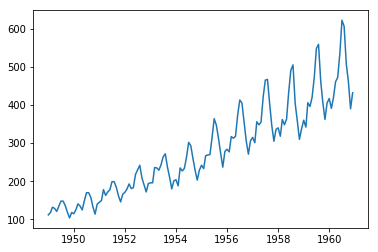

In [13]:
import matplotlib.pyplot as plt
plt.plot(ts)

In [37]:
from statsmodels.tsa.stattools import adfuller
def check_stationality(timeseries):
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rolmean, color="black", label="Rolling mean")
    std = plt.plot(rolstd, color="red", label="Rolling std")
    
    plt.legend(loc="best")
    plt.title("Rolling Statistics")
    plt.show()
    
    #dickey-fuller test
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistics", "p-value", "#Lags Used", "Number of observations used"])
    print(dftest[0:4])
    for key,value in dftest[0:4].items():
        dfoutput["critical values (%s)"%key] = value
    print(dfoutput)

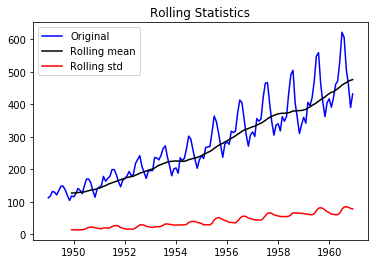

(0.8153688792060423, 0.9918802434376409, 13, 130)


AttributeError: 'tuple' object has no attribute 'items'

In [38]:
check_stationality(ts)

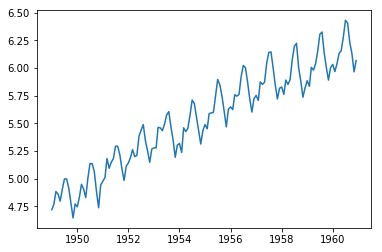

In [39]:
ts_log = np.log(ts)
plt.plot(ts_log)

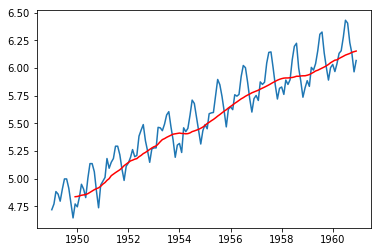

In [43]:
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color="Red")

In [45]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(13)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
Name: #Passengers, dtype: float64

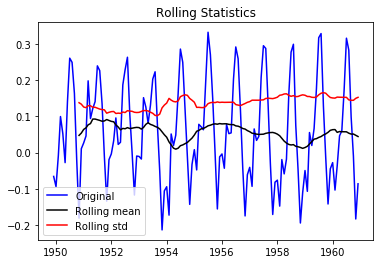

(-3.162907991300858, 0.022234630001243844, 13, 119)


AttributeError: 'tuple' object has no attribute 'items'

In [47]:
ts_log_moving_avg_diff.dropna(inplace=True)
check_stationality(ts_log_moving_avg_diff)

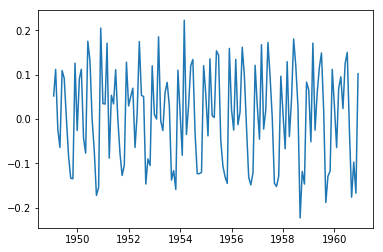

In [48]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

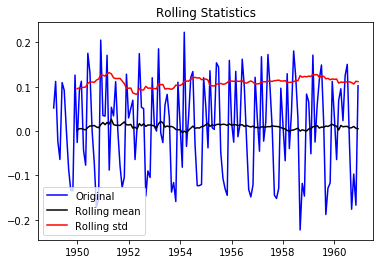

(-2.717130598388145, 0.0711205481508568, 14, 128)


AttributeError: 'tuple' object has no attribute 'items'

In [50]:
ts_log_diff.dropna(inplace=True)
check_stationality(ts_log_diff)

In [52]:
from statsmodels.tsa.stattools import acf,pacf

In [54]:
lag_acf = acf(ts_log_diff, nlags = 20)
lag_pacf = pacf(ts_log_diff, nlags = 20, method = "ols")

Text(0.5, 1.0, 'Autocorrelation Function')

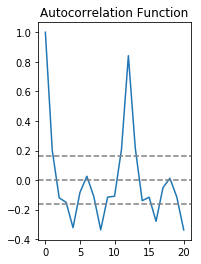

In [55]:
#ACF plot
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

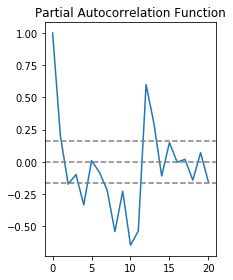

In [56]:
#pacf plot
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [58]:
from statsmodels.tsa.arima_model import ARIMA

/home/kartik/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kartik/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

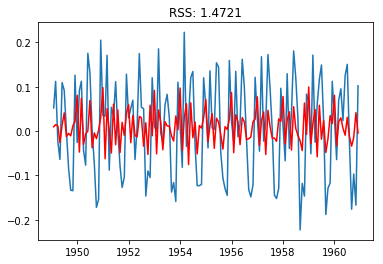

In [60]:
#AR Model
model = ARIMA(ts_log, order=(0,1,2))
results_AR = model.fit(disp =- 1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/home/kartik/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kartik/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

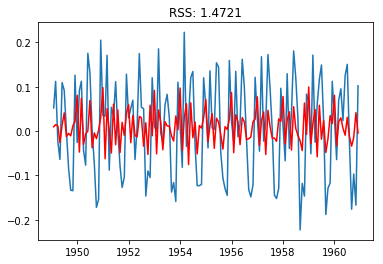

In [61]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/home/kartik/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/kartik/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


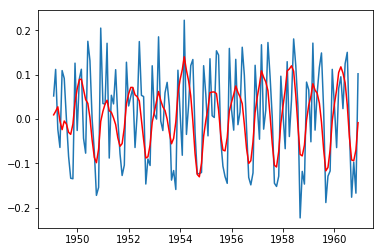

In [67]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [70]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [71]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/home/kartik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1046')

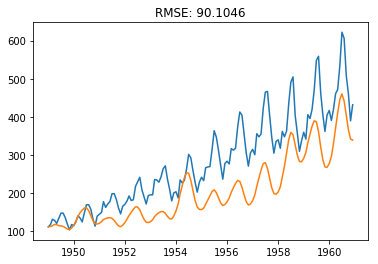

In [72]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))